<h1>ZADATAK 1</h1>

Za početak, ponovo ćemo koristiti naš Iris skup podataka kao inicijalni primer. Ovde bismo da upotrebimo model K-usrednjavanja da bismo predvideli vrste Irisa, na osnovu dužine i širine latica i čašičnih listića. 

Počnimo unošenjem odgovarajućih podataka:

In [630]:
import numpy as np
import pandas as pd
import scipy.optimize as sco
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(123)

In [631]:
df1 = px.data.iris()
df1

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


Da bismo napravili instancu klase potrebno je da navedemo broj klastra (napravimo pretpostavku). Ljudi znaju da postoje 3 vrste Irisa, pa postavljamo broj klastera na 3:

In [572]:
kmeans = KMeans(n_clusters=3)

In [573]:
X_iris = df1.iloc[:,:4] 
X_iris.shape

(150, 4)

In [574]:
y_iris = iris.target 

Prvo ćemo izvršiti scalling podataka:

In [575]:
x_scaled = StandardScaler().fit_transform(X_iris)

Dalje, treniramo model na osnovu *x_scaled*:

In [576]:
m=kmeans.fit(x_scaled)

Konačno, koristimo trenažni model za procenjivanje (tj. predviđanje) članstva klasteru svake opservacije:

In [577]:
y_kmeans = kmeans.predict(x_scaled)

Sada vizuelizujmo rezultate. S obzirom da imamo četiri karakteristike možemo koristiti glavne komponente iz prethodno izvedenog PCA, kako bismo predstavili rezultate modela K-Sredina u dvodimenzionom prostoru. 

Nacrtaćemo scatter grafikon za PC1 i PC2, pri čemu će svaka tačka na grafikonu biti obojena zavisno od toga kom klasteru pripada (tj. varijabla variable *y_kmeans*). 

In [628]:
pca = PCA(n_components=2)
 
pca_features = pca.fit_transform(x_scaled)
 

In [632]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=pca_features[:, 0],y=pca_features[:, 1],mode='markers',marker=dict(color=y_kmeans,
                                                                              colorscale=['Navy','MediumVioletRed','DarkSeaGreen']))) 
fig.update_layout(xaxis=dict(title='PC1',zerolinecolor='Black'),yaxis=dict(title='PC2',zerolinecolor='Black'),
                 title=dict(text="Estimated clusters",x=0.5,y=0.87,font=dict(size=25,color='Navy')))
fig.show()

Da biste ovaj klaster videli jasnije, možete takođe uneti i centroide na grafikon. Centroidi u originalnom vektorskom prostoru (sa 4 karakteristike) se mogu dobiti preko metoda <font color='DeepPink'><b>cluster_centers_</b></font>. Međutim, mi hoćemo da ih vidimo u novom vektorskom prostoru (izgrađenom iz dve glavne komponente), stoga ćemo koristiti metod <font color='DeepPink'><b>transform</b></font> iz klase <font color='DodgerBlue'><b>PCA</b></font> da bismo ih transformisali:

In [580]:
centers = pca.transform(kmeans.cluster_centers_)
centers

array([[ 0.56713803, -0.8076751 ],
       [-2.22019328,  0.29222482],
       [ 1.72236912,  0.59990509]])

Sada ih i nacrtajmo na grafikonu od malopre:

In [581]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=pca_features[:, 0],y=pca_features[:, 1],mode='markers',marker=dict(color=y_kmeans,
                                                                              colorscale=['Navy','MediumVioletRed','DarkSeaGreen']))) 
fig.add_trace(go.Scatter(x=centers[:,0],y=centers[:,1],mode='markers',marker=dict(size=17,color='Black'),name='Cetroids')) 
fig.update_layout(xaxis=dict(title='PC1',zerolinecolor='Black'),yaxis=dict(title='PC2',zerolinecolor='Black'),
                 title=dict(text="Estimated Clusters",x=0.5,y=0.87,font=dict(size=25,color='Navy')),showlegend=False)
fig.show()

<h1> ZADATAK 2 </h1>

In [582]:
Data = pd.read_csv('train.csv') 

In [583]:
Data.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [584]:
print('Oblik dataseta: ' + str(Data.shape))

Oblik dataseta: (3609, 563)


In [585]:
#save labels as string
Labels = Data['activity']
Data = Data.drop(['rn', 'activity'], axis = 1)
Labels_keys = Labels.unique().tolist()
Labels = np.array(Labels)
print('Activity labels: ' + str(Labels_keys))

Activity labels: ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [586]:
#check for missing values
Temp = pd.DataFrame(Data.isnull().sum())
Temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Amount of rows with missing values: 0


In [587]:
Temp

,Sum
tBodyAcc.mean.X,0
tBodyAcc.mean.Y,0
tBodyAcc.mean.Z,0
tBodyAcc.std.X,0
tBodyAcc.std.Y,0
...,...
angle.tBodyGyroMean.gravityMean,0
angle.tBodyGyroJerkMean.gravityMean,0
angle.X.gravityMean,0
angle.Y.gravityMean,0


In [588]:
Data.isnull().sum()

tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
tBodyAcc.std.X                         0
tBodyAcc.std.Y                         0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 561, dtype: int64

In [589]:
#normalize the dataset
scaler = StandardScaler()
Data = scaler.fit_transform(Data)


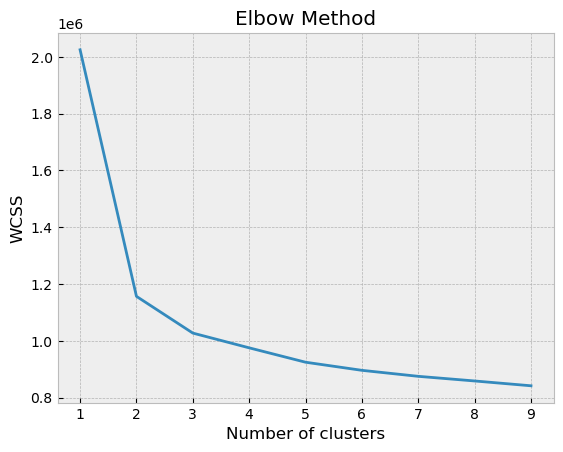

In [590]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Data)
    wcss.append(kmeans.inertia_)



plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<h1> ZADATAK 3</h1>

In [591]:
dataset = pd.read_csv('cars.csv')
dataset

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [592]:
dataset.shape

(261, 8)

In [593]:
X = dataset.iloc[:,:-1].values
X

array([[14.0, 8, '350', ..., '4209', 12, 1972],
       [31.9, 4, '89', ..., '1925', 14, 1980],
       [17.0, 8, '302', ..., '3449', 11, 1971],
       ...,
       [22.0, 6, '232', ..., '2835', 15, 1983],
       [18.0, 6, '232', ..., '3288', 16, 1972],
       [22.0, 6, '250', ..., '3353', 15, 1977]], dtype=object)

In [594]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978
...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980
257,36.1,4,91,60,1800,16,1979
258,22.0,6,232,112,2835,15,1983
259,18.0,6,232,100,3288,16,1972


In [595]:
X = X._convert(numeric=True)

In [596]:
X.columns = ['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60', 'year']
X

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978
...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,3840.0,15,1980
257,36.1,4,91.0,60,1800.0,16,1979
258,22.0,6,232.0,112,2835.0,15,1983
259,18.0,6,232.0,100,3288.0,16,1972


In [597]:
X.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    2
 hp             0
 weightlbs      3
 time-to-60     0
year            0
dtype: int64

In [598]:
for i in X.columns:
    X[i] = X[i].fillna(X[i].mean())

X.isnull().sum()


mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
year            0
dtype: int64

In [599]:
#normalize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.17112732,  1.39305285,  1.37239295, ...,  1.41499703,
        -1.22128734, -1.32753906],
       [ 1.12122635, -0.91910482, -1.03028992, ..., -1.28008557,
        -0.53282946,  0.8758803 ],
       [-0.78693397,  1.39305285,  0.93052024, ...,  0.51820947,
        -1.56551627, -1.60296648],
       ...,
       [-0.14661172,  0.23697401,  0.28612253, ..., -0.20630047,
        -0.18860053,  1.70216257],
       [-0.65886952,  0.23697401,  0.28612253, ...,  0.32823211,
         0.15562841, -1.32753906],
       [-0.14661172,  0.23697401,  0.4518248 , ...,  0.40493105,
        -0.18860053,  0.04959804]])

C:\Users\katar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



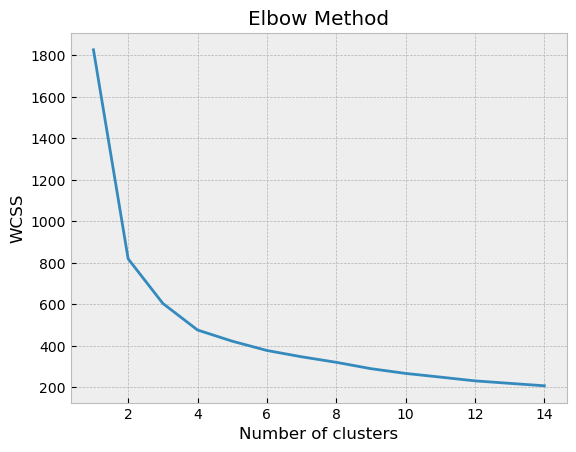

In [600]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [601]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

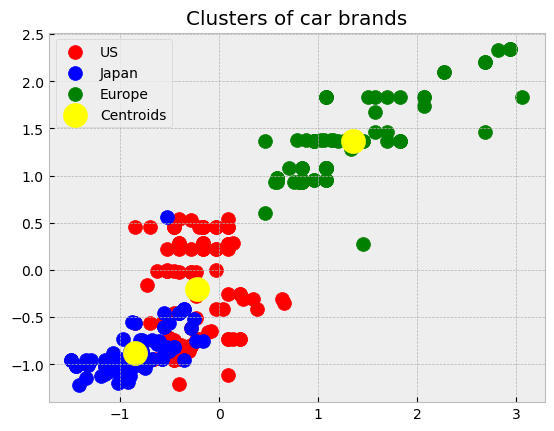

In [602]:
plt.scatter(X[y_kmeans == 0, 3], X[y_kmeans == 0,2],s=100,c='red',label='US')
plt.scatter(X[y_kmeans == 1, 3], X[y_kmeans == 1,2],s=100,c='blue',label='Japan')
plt.scatter(X[y_kmeans == 2, 3], X[y_kmeans == 2,2],s=100,c='green',label='Europe')
plt.scatter(kmeans.cluster_centers_[:,3],kmeans.cluster_centers_[:,2],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()

<h1> ZADATAK 4 </h1>

In [603]:
df = pd.read_csv("movies_metadata.csv")
df


C:\Users\katar\AppData\Local\Temp\ipykernel_46824\1131639009.py:1: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [605]:
df_numeric = df[['budget','popularity','revenue','runtime','vote_average','vote_count','title']]
df_numeric

,budget,popularity,revenue,runtime,vote_average,vote_count,title
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,Toy Story
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,Jumanji
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men
3,16000000,3.859495,81452156.0,127.0,6.1,34.0,Waiting to Exhale
4,0,8.387519,76578911.0,106.0,5.7,173.0,Father of the Bride Part II
...,...,...,...,...,...,...,...
45461,0,0.072051,0.0,90.0,4.0,1.0,Subdue
45462,0,0.178241,0.0,360.0,9.0,3.0,Century of Birthing
45463,0,0.903007,0.0,90.0,3.8,6.0,Betrayal
45464,0,0.003503,0.0,87.0,0.0,0.0,Satan Triumphant


In [606]:
df_numeric.isnull().sum()

budget            0
popularity        5
revenue           6
runtime         263
vote_average      6
vote_count        6
title             6
dtype: int64

In [607]:
df_numeric.dropna(inplace=True)

C:\Users\katar\AppData\Local\Temp\ipykernel_46824\2939391043.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [608]:
df_numeric.isnull().sum()

budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
title           0
dtype: int64

In [609]:
df_numeric['vote_count'].describe()

count    45203.000000
mean       110.506515
std        492.638190
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

Vidimo da je polovina filmova ocenjena manje od 10 puta. Radi lakše interpretacije, uzmimo samo filmove koji imaju više od 30 glasova, odnosno top 26% filmova.

In [610]:
df_numeric['vote_count'].quantile(np.arange(0.73,1,0.01))

0.73      30.00
0.74      32.00
0.75      34.00
0.76      37.00
0.77      40.00
0.78      43.00
0.79      46.00
0.80      51.00
0.81      55.00
0.82      61.00
0.83      67.00
0.84      74.00
0.85      83.00
0.86      92.00
0.87     104.74
0.88     119.00
0.89     139.00
0.90     161.00
0.91     193.00
0.92     230.00
0.93     283.00
0.94     349.00
0.95     435.90
0.96     581.00
0.97     827.94
0.98    1243.88
0.99    2196.84
Name: vote_count, dtype: float64

In [611]:
df_numeric = df_numeric[df_numeric['vote_count']>30]

In [612]:
df_numeric.shape

(12178, 7)

In [613]:
X=df_numeric.iloc[:,:-1]
X

,budget,popularity,revenue,runtime,vote_average,vote_count
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0
2,0,11.7129,0.0,101.0,6.5,92.0
3,16000000,3.859495,81452156.0,127.0,6.1,34.0
4,0,8.387519,76578911.0,106.0,5.7,173.0
...,...,...,...,...,...,...
45353,0,2.302582,0.0,92.0,5.9,33.0
45373,0,9.222308,0.0,83.0,6.0,38.0
45380,0,5.667067,0.0,83.0,6.2,37.0
45437,0,20.82178,0.0,4.0,8.3,146.0


In [614]:
#normalize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 4.91697788e-01,  1.44775584e+00,  2.79001069e+00,
        -7.59056452e-01,  1.51345417e+00,  5.63757820e+00],
       [ 1.61944193e+00,  9.40831129e-01,  1.86053288e+00,
         3.15121523e-03,  6.43166436e-01,  2.27073058e+00],
       [-4.74940045e-01,  3.95745237e-01, -3.44877940e-01,
        -9.62671761e-02,  2.08022567e-01, -3.32351814e-01],
       ...,
       [-4.74940045e-01, -2.25737439e-01, -3.44877940e-01,
        -6.92777524e-01, -1.18335335e-01, -3.94036231e-01],
       [-4.74940045e-01,  1.33209447e+00, -3.44877940e-01,
        -3.31079516e+00,  2.16616998e+00, -2.71788932e-01],
       [-4.74940045e-01, -3.56768233e-01, -3.44877940e-01,
        -9.62671761e-02, -1.20619501e+00, -2.72910467e-01]])

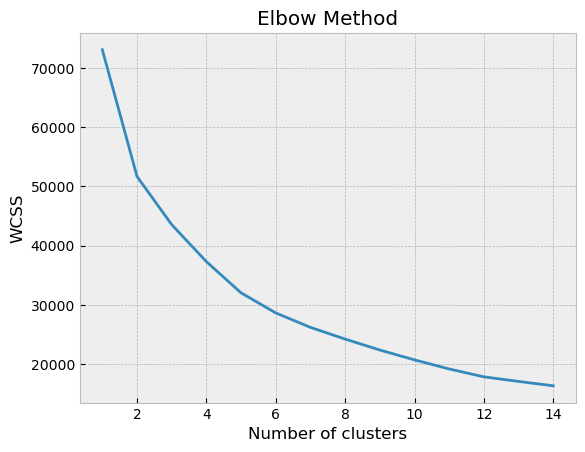

In [615]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [616]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [617]:
len(kmeans.labels_)

12178

In [618]:
df_numeric['cluster'] = kmeans.labels_
df_numeric

C:\Users\katar\AppData\Local\Temp\ipykernel_46824\2770400717.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,Toy Story,4
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,Jumanji,1
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,0
3,16000000,3.859495,81452156.0,127.0,6.1,34.0,Waiting to Exhale,0
4,0,8.387519,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,2
...,...,...,...,...,...,...,...,...
45353,0,2.302582,0.0,92.0,5.9,33.0,Frankenstein Created Woman,2
45373,0,9.222308,0.0,83.0,6.0,38.0,Take Me,2
45380,0,5.667067,0.0,83.0,6.2,37.0,The Incredible Jessica James,2
45437,0,20.82178,0.0,4.0,8.3,146.0,In a Heartbeat,0


Jasno vidimo da je jedan klaster najveći, a jedan ima najmanji broj filmova.

In [619]:
df_numeric.groupby(['cluster']).count()['budget'].values

array([5760, 1288, 4889,   16,  225], dtype=int64)

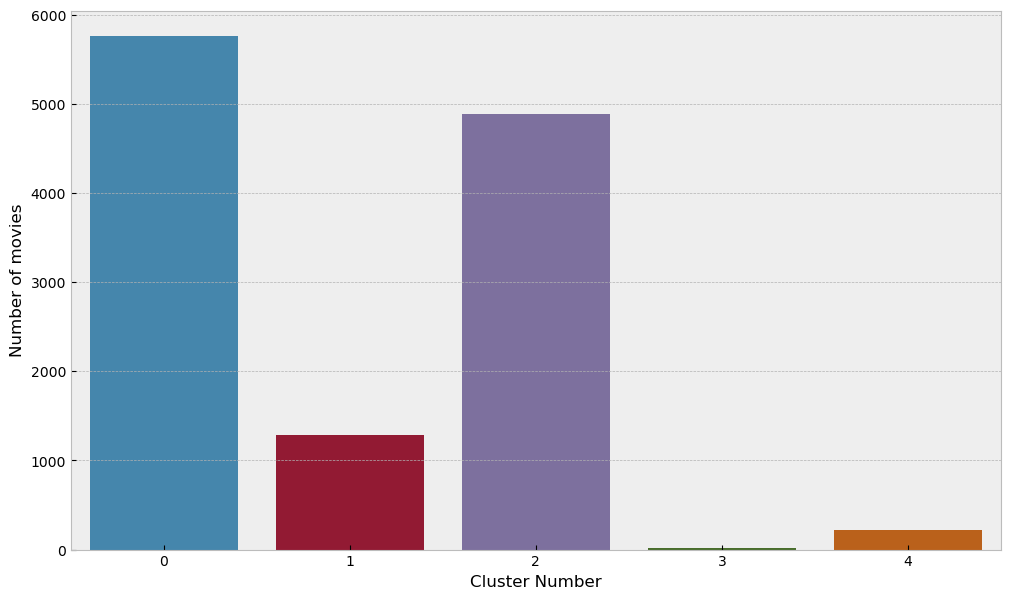

In [620]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=df_numeric.groupby(['cluster']).count()['budget'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [621]:
df_numeric.groupby(['cluster']).mean()

,revenue,runtime,vote_average,vote_count
cluster,,,,
0,1.136932e+07,109.539062,6.962049,197.257812
1,1.700752e+08,116.003106,6.411025,1345.090062
2,1.118249e+07,92.968501,5.480180,138.202086
3,8.310870e+08,129.625000,7.256250,6390.687500
4,6.575602e+08,126.222222,6.936889,4811.382222


In [622]:
size_array = list(df_numeric.groupby(['cluster']).count()['budget'].values)
size_array

[5760, 1288, 4889, 16, 225]

In [623]:
size_array.index(sorted(size_array)[0])

3

In [624]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[0])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
42222,160000000,287.253654,1.262886e+09,129.0,6.8,5530.0,Beauty and the Beast,3
26567,250000000,145.882135,1.153304e+09,147.0,7.1,7462.0,Captain America: Civil War,3
33356,149000000,294.337037,8.205804e+08,141.0,7.2,5025.0,Wonder Woman,3
14551,237000000,185.070892,2.787965e+09,162.0,7.2,12114.0,Avatar,3
26566,200000000,185.330992,8.634161e+08,137.0,7.6,4858.0,Guardians of the Galaxy Vol. 2,3


Vidimo mnoga velika filmska imena u ovoj grupi. Dakle, rezultati su intuitivni.



In [625]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[1])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
30556,165000000,16.993841,3.896819e+08,120.0,4.9,2550.0,Independence Day: Resurgence,4
7000,94000000,29.324358,1.118889e+09,201.0,8.1,8226.0,The Lord of the Rings: The Return of the King,4
11067,270000000,13.284712,3.910812e+08,154.0,5.4,1429.0,Superman Returns,4
19814,120000000,26.080995,8.290000e+08,115.0,6.1,2641.0,The Twilight Saga: Breaking Dawn - Part 2,4
23465,178000000,31.982986,3.705413e+08,113.0,7.6,4979.0,Edge of Tomorrow,4


In [626]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[-1])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
9751,500000,3.569896,0.0,105.0,7.4,78.0,Control,0
3804,0,4.372409,0.0,83.0,7.4,80.0,Abbott and Costello Meet Frankenstein,0
10920,0,4.772204,2077763.0,116.0,7.0,152.0,Candy,0
24879,0,3.103506,0.0,115.0,7.4,44.0,Gett: The Trial of Viviane Amsalem,0
2615,11000000,14.003467,20000000.0,184.0,7.7,521.0,Barry Lyndon,0


Kao što vidimo, ovaj klaster takođe uključuje filmove za koje naš skup podataka nema informacije o budžetu i prihodima, pa odgovarajuća polja imaju vrednost 0. Ovo smanjuje prihod celog klastera. 